In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as ply_go

In [10]:
data_dir = r"D:/deeplearning/public_dataset/"
metadata_file = "metadata_compiled.csv"

metadata = pd.read_csv(data_dir + metadata_file)

metadata.columns

Index(['uuid', 'datetime', 'cough_detected', 'SNR', 'latitude', 'longitude',
       'age', 'gender', 'respiratory_condition', 'fever_muscle_pain', 'status',
       'quality_1', 'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1',
       'choking_1', 'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1',
       'quality_2', 'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2',
       'choking_2', 'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2',
       'quality_3', 'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3',
       'choking_3', 'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3',
       'quality_4', 'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4',
       'choking_4', 'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

In [11]:
len(metadata)

27550

In [12]:
metadata["cough_detected"].describe()

count    27550.000000
mean         0.649544
std          0.387850
min          0.000000
25%          0.208225
50%          0.871300
75%          0.986300
max          1.000000
Name: cough_detected, dtype: float64

In [13]:
# choose good subset with cough_detected above the predefined threshold
cough_prob_thre = 0.8
metadata_filt = metadata[metadata["cough_detected"] > cough_prob_thre]

In [14]:
metadata.head(5)

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cols_to_boolean = ['respiratory_condition', 'fever_muscle_pain', 
       'quality_1', 'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1',
       'choking_1', 'congestion_1', 'nothing_1', 
       'quality_2', 'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2',
       'choking_2', 'congestion_2', 'nothing_2', 
       'quality_3', 'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3',
       'choking_3', 'congestion_3', 'nothing_3', 
       'quality_4', 'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4',
       'choking_4', 'congestion_4', 'nothing_4']
    
for c in cols_to_boolean:
    metadata.loc[metadata[c].notnull(), c] = metadata.loc[metadata[c].notnull(), c].astype(bool)

print('NaN in each column')
print(metadata.isnull().sum())


NaN in each column
uuid                         0
datetime                     0
cough_detected               0
SNR                          0
latitude                 11466
longitude                11466
age                      12332
gender                   11326
respiratory_condition    11326
fever_muscle_pain        11326
status                   11326
quality_1                26730
cough_type_1             26748
dyspnea_1                26730
wheezing_1               26730
stridor_1                26730
choking_1                26730
congestion_1             26730
nothing_1                26730
diagnosis_1              26748
severity_1               26748
quality_2                26730
cough_type_2             26749
dyspnea_2                26730
wheezing_2               26730
stridor_2                26730
choking_2                26730
congestion_2             26730
nothing_2                26730
diagnosis_2              26748
severity_2               26748
quality_3           

In [16]:
cols_to_fillna = ['gender', 'status', 'diagnosis_1', 'diagnosis_2', 'diagnosis_3', 'diagnosis_4']
metadata[cols_to_fillna] = metadata[cols_to_fillna].fillna('n/a')

In [17]:
metadata.head(5)

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,n/a,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/a,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/a,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/a,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/a,NaN
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NaN,n/a,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n/a,NaN


### Plot Histograms (distribution of values for each column)

In [18]:
"""my_title_layout = dict({"text":"my distribution", 'xanchor':'center', 'x':0.5, 'y':0.9, 'font':{'size':24}})
my_xaxis_layout = dict(title=dict(text="my x axis", font={'size':16}))
my_layout = dict(title=my_title_layout,
                xaxis= my_xaxis_layout)
bin_size_dict = dict(SNR=0.5, age= 2, gender=1, respiratory_condition=1, fever_muscle_pain=1, status=1 )
xaxis_title_dict = dict(SNR="Signal-to-Noise Ratio" , age="Age", 
                        gender="Gender", respiratory_condition="Resp. Condition", fever_muscle_pain="Fever", status="Status" )
                        
for c in ['SNR', 'age', 'gender','respiratory_condition','fever_muscle_pain', 'status']:
    hist_data = ply_go.Histogram(x=metadata[c], name=c, showlegend=False, xbins={'size':bin_size_dict[c]})
    fig = ply_go.Figure(data=[hist_data], layout=my_layout)
    fig.update_layout(title={'text': c+" distribution"}, xaxis={"title":{"text":xaxis_title_dict[c]}})
    fig.show()"""

'my_title_layout = dict({"text":"my distribution", \'xanchor\':\'center\', \'x\':0.5, \'y\':0.9, \'font\':{\'size\':24}})\nmy_xaxis_layout = dict(title=dict(text="my x axis", font={\'size\':16}))\nmy_layout = dict(title=my_title_layout,\n                xaxis= my_xaxis_layout)\nbin_size_dict = dict(SNR=0.5, age= 2, gender=1, respiratory_condition=1, fever_muscle_pain=1, status=1 )\nxaxis_title_dict = dict(SNR="Signal-to-Noise Ratio" , age="Age", \n                        gender="Gender", respiratory_condition="Resp. Condition", fever_muscle_pain="Fever", status="Status" )\n                        \nfor c in [\'SNR\', \'age\', \'gender\',\'respiratory_condition\',\'fever_muscle_pain\', \'status\']:\n    hist_data = ply_go.Histogram(x=metadata[c], name=c, showlegend=False, xbins={\'size\':bin_size_dict[c]})\n    fig = ply_go.Figure(data=[hist_data], layout=my_layout)\n    fig.update_layout(title={\'text\': c+" distribution"}, xaxis={"title":{"text":xaxis_title_dict[c]}})\n    fig.show()'

In [19]:
"""ConnectionRefusedErrorfig = ply_go.Figure()

for tmp_diag in metadata['status'].unique():
    print('Plotting for {}'.format(tmp_diag))
    violin_data = ply_go.Violin( x =  metadata.loc[metadata['status']==tmp_diag, "status"], 
                                 y =  metadata.loc[metadata['status']==tmp_diag, "age"],
                                 name = tmp_diag, 
                                 box_visible = True,
                                 meanline_visible = True)
    fig.add_trace(violin_data)

fig.update_layout(title = {'text': 'Distribution of age by covid status'},
                  yaxis = {'title': {'text': 'Age (years)'}})
fig.show()"""

'ConnectionRefusedErrorfig = ply_go.Figure()\n\nfor tmp_diag in metadata[\'status\'].unique():\n    print(\'Plotting for {}\'.format(tmp_diag))\n    violin_data = ply_go.Violin( x =  metadata.loc[metadata[\'status\']==tmp_diag, "status"], \n                                 y =  metadata.loc[metadata[\'status\']==tmp_diag, "age"],\n                                 name = tmp_diag, \n                                 box_visible = True,\n                                 meanline_visible = True)\n    fig.add_trace(violin_data)\n\nfig.update_layout(title = {\'text\': \'Distribution of age by covid status\'},\n                  yaxis = {\'title\': {\'text\': \'Age (years)\'}})\nfig.show()'

In [20]:
"""fig  = ply_go.Figure()

for tmp_diag in metadata['status'].unique():
    violin_data = ply_go.Violin( x =  metadata.loc[metadata['status']==tmp_diag, "status"], 
                                 y =  metadata.loc[metadata['status']==tmp_diag, "cough_detected"],
                                 name = tmp_diag, 
                                 box_visible = True,
                                 meanline_visible = True)
    fig.add_trace(violin_data)

fig.update_layout(title = {'text': 'Distribution of cough score by covid status'},
                  yaxis = {'title': {'text': 'Cough Score [0-1]'}})
fig.show()"""

'fig  = ply_go.Figure()\n\nfor tmp_diag in metadata[\'status\'].unique():\n    violin_data = ply_go.Violin( x =  metadata.loc[metadata[\'status\']==tmp_diag, "status"], \n                                 y =  metadata.loc[metadata[\'status\']==tmp_diag, "cough_detected"],\n                                 name = tmp_diag, \n                                 box_visible = True,\n                                 meanline_visible = True)\n    fig.add_trace(violin_data)\n\nfig.update_layout(title = {\'text\': \'Distribution of cough score by covid status\'},\n                  yaxis = {\'title\': {\'text\': \'Cough Score [0-1]\'}})\nfig.show()'

### Compute features for all audio files .wav


def preprocess_metadata(raw_data):

    # preprocessing

    return processed_data

def cross_ref_wav_metadata(metadata, wav):


    return metadata_wav_intersect_data

def preprocess_wav(wav):
    wav +1


    return wav_features

def main():

    # Preprocess metadata
    metadata_preprocessed = preprocess_metadata(metadata_raw)
    
    # cross-reference metadata and .wav datasets
    metadata_wav_intersect_data = cross_ref_wav_metadata(metadata_preprocessed, wav_all)

    # loop over all .wav and preprocessing
    wav_features_all # pandas.DataFrame

    for wav in metadata_wav_intersect_data:

        wav_features = preprocess_wav(wav)

        # append wav_features features to wav_features_all


    # add a label column from metadata (covid vs not-covid)

    # save wav_features_all (final output) to disk




In [21]:
from DSP import preprocess_cough
from feature_class import features 
from scipy.io import wavfile

def compute_audio_features(x, fs):
    """Compute features for an inputted audio signal using filtering, feature extraction
    Inputs: 
        x: (float array) raw cough signal
        fs: (int) sampling rate of raw signal
    Outputs:
        feature_values_vec: computed audio features
    """
    x,fs = preprocess_cough(x,fs)
    data = (fs,x)
    FREQ_CUTS = [(0,200),(300,425),(500,650),(950,1150),(1400,1800),(2300,2400),(2850,2950),(3800,3900)]
    features_fct_list = ['EEPD','ZCR','RMSP','DF','spectral_features','SF_SSTD','SSL_SD','CF','LGTH','PSD'] #MFCC
    feature_values_vec = []
    obj = features(FREQ_CUTS)
    for feature in features_fct_list:
        feature_values, feature_names = getattr(obj,feature)(data)

        #print("{} ouput {} values".format(feature, len(feature_values)))
        for value  in feature_values:
            if isinstance(value,np.ndarray):
                feature_values_vec.append(value[0])
            else:
                feature_values_vec.append(value)
    
    return feature_values_vec

In [22]:
import numpy as np
data_folder = 'D:/deeplearning/output/'
wav_fname = '0a0b83e9-860d-42ec-855b-49e73c5ad49e.wav'
fs, audio_sig = wavfile.read(data_folder+'/'+ wav_fname)
audio_features = compute_audio_features(audio_sig, fs)

In [23]:
type(audio_features)

list

Text(0.5, 1.0, 'Input cough signal')

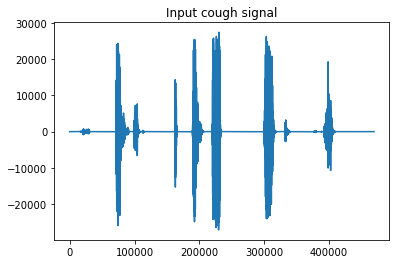

In [24]:
import matplotlib.pyplot as plt
import plotly.graph_objects as ply_go
plt.plot(audio_sig)
plt.title("Input cough signal")

In [25]:
# 导入所需要的包
import glob
from scipy.io import wavfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# wav文件所在的位置，并读取完整的文件名
data_folder = 'D:/deeplearning/output/'
wav_fnames = glob.glob(data_folder + "*.wav")
#  读取csv文件
metadata_file = "metadata_compiled.csv"
metadata = pd.read_csv(metadata_file)

# audio_features_all = []
ret = {}
for wav_fname in wav_fnames:
    
    uuid = wav_fname.split("\\")[-1].split(".")[0]
    fs, audio_sig = wavfile.read(wav_fname)
    audio_features = compute_audio_features(audio_sig, fs)
    
    ret[uuid] = audio_features

    # Mark to-do: use uuid in .wav file name to find the corresponding row in metadata
    #             attach fields in metadata to the audio_features

#     audio_features_all.append(audio_features)


tmp_df = pd.DataFrame.from_dict(ret,orient="index",columns=[ "feature"+str(i+1) for i in range(42)])
tmp_df.reset_index(inplace=True)
tmp_df


c:\Users\tomdu\Desktop\coughvid\lung_sound_ml\feature_class.py:134: RuntimeWarning: invalid value encountered in double_scalars
  spec_centroid = np.sum(magnitudes*freqs) / sum_mag
c:\Users\tomdu\Desktop\coughvid\lung_sound_ml\feature_class.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  SF = gmean/amean
c:\Users\tomdu\Desktop\coughvid\lung_sound_ml\feature_class.py:218: RuntimeWarning: invalid value encountered in true_divide
  return np.ones((1,1))*peak/RMS, ['Crest_Factor']
c:\Users\tomdu\Desktop\coughvid\lung_sound_ml\feature_class.py:237: RuntimeWarning: invalid value encountered in double_scalars
  feat.append(band_power/total_power)


,index,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,67,65,62,64,63,65,68,63,69,...,8.691408,9.72,0.000613,0.361151,0.046664,0.024270,0.014598,0.002485,0.000949,0.000142
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,69,69,71,70,69,70,69,71,71,...,18.546494,9.78,0.143895,0.245783,0.027215,0.030523,0.017626,0.001013,0.001303,0.000880
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,67,67,68,63,68,66,68,65,69,...,19.355701,9.78,0.014249,0.005629,0.121108,0.051308,0.005685,0.000031,0.000021,0.000032
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,29,29,28,30,34,35,32,30,35,...,5.835781,4.50,0.083096,0.033716,0.383841,0.027448,0.017139,0.000371,0.000372,0.000890
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,71,71,71,71,71,71,71,71,71,...,298.528161,9.96,0.039412,0.022016,0.027734,0.039129,0.082470,0.019363,0.019439,0.018620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27545,fff30afc-db62-4408-a585-07ca9a254fcc,70,73,69,70,69,71,68,71,73,...,14.220777,9.90,0.017375,0.056499,0.098152,0.087745,0.011897,0.004637,0.010442,0.005456
27546,fff3ff61-2387-4139-938b-539db01e6be5,14,13,12,14,15,13,15,15,15,...,6.573601,2.04,0.000289,0.005430,0.015405,0.002801,0.045640,0.046947,0.002080,0.008504
27547,fff474bf-39a4-4a61-8348-6b992fb5e439,65,67,65,68,67,67,66,67,66,...,43.229519,9.72,0.026112,0.224073,0.020728,0.003899,0.010907,0.016782,0.006258,0.001321
27548,fffaa9f8-4db0-46c5-90fb-93b7b014b55d,62,61,62,65,70,71,63,70,67,...,5.794754,9.90,0.062791,0.059401,0.074046,0.067132,0.039082,0.004506,0.000442,0.000087


In [26]:
import pandas as pd
import numpy as np
#merger
result = pd.merge(metadata,tmp_df,left_on="uuid", right_on="index",how="inner")
result.to_csv('all_data.csv')

In [27]:
row_missing = result.iloc[:,1:11].isnull().any(axis = 1)
drop_cough_detected = result.cough_detected < 0.8   
target_drop_row = row_missing | drop_cough_detected

In [28]:
drop_index = result.uuid[target_drop_row]
full_data = result[~target_drop_row]

In [29]:
import os 

for wav in wav_fnames:
    if wav.split("\\")[1].split(".")[0] in drop_index.values:
       if os.path.exists(wav):
           os.remove(wav)

In [30]:
full_data.to_csv("data.csv")